Link for course page - https://jovian.com/learn/nautral-language-processing-zero-to-nlp/lesson/text-classification-with-bag-of-words#C0  
Libk for video - https://www.youtube.com/watch?v=isuRxhLQSXU&t=4s

# Text Classification with Bag of Words - Natural Language Processing

Natural language processing (NLP) is a subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language, in particular how to program computers to process and analyze large amounts of natural language data." - Wikipedia

Bag of Words: The bag-of-words (BOW) model is a representation that turns arbitrary text into fixed-length vectors by counting how many times each word appears.

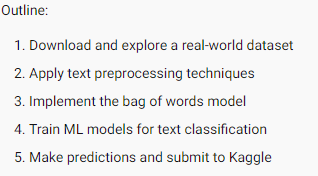

Dataset: https://www.kaggle.com/c/quora-insincere-questions-classification

# 1 - Download and Explore the Data

## 1.1 - Explore the Data using Pandas

In [23]:
%%time
!kaggle competitions download -c quora-insincere-questions-classification

... resuming from 84934656 bytes (6391410502 bytes left) ...

CPU times: total: 62.5 ms
Wall time: 10min 56s



  1%|1         | 81.0M/6.03G [00:00<?, ?B/s]
  1%|1         | 82.0M/6.03G [00:00<1:07:35, 1.58MB/s]
  1%|1         | 83.0M/6.03G [00:00<34:35, 3.08MB/s]  
  1%|1         | 85.0M/6.03G [00:00<18:52, 5.64MB/s]
  1%|1         | 86.0M/6.03G [00:01<16:12, 6.57MB/s]
  1%|1         | 88.0M/6.03G [00:01<13:12, 8.06MB/s]
  1%|1         | 89.0M/6.03G [00:01<12:27, 8.54MB/s]
  1%|1         | 90.0M/6.03G [00:01<12:00, 8.86MB/s]
  1%|1         | 91.0M/6.03G [00:01<11:29, 9.25MB/s]
  1%|1         | 92.0M/6.03G [00:01<11:10, 9.52MB/s]
  2%|1         | 93.0M/6.03G [00:01<10:57, 9.70MB/s]
  2%|1         | 94.0M/6.03G [00:01<11:00, 9.65MB/s]
  2%|1         | 96.0M/6.03G [00:02<10:25, 10.2MB/s]
  2%|1         | 98.0M/6.03G [00:02<10:24, 10.2MB/s]
  2%|1         | 99.0M/6.03G [00:02<10:37, 10.0MB/s]
  2%|1         | 101M/6.03G [00:02<10:19, 10.3MB/s] 
  2%|1         | 103M/6.03G [00:02<09:54, 10.7MB/s]
  2%|1         | 105M/6.03G [00:02<09:41, 11.0MB/s]
  2%|1         | 107M/6.03G [00:03<09:42, 10.9MB/s]

In [82]:
import os
import zipfile
from io import BytesIO
import pandas as pd

zip_file_path = 'quora-insincere-questions-classification.zip'
train_fname = 'train.csv'
test_fname = 'test.csv'
sample_fname = 'sample_submission.csv'

# Open the ZIP file
with zipfile.ZipFile(zip_file_path) as z:
    # Read the CSV file into a pandas DataFrame
    with z.open(train_fname) as f:
        raw_df = pd.read_csv(f)

In [79]:
raw_df

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0
...,...,...,...
1306117,ffffcc4e2331aaf1e41e,What other technical skills do you need as a c...,0
1306118,ffffd431801e5a2f4861,Does MS in ECE have good job prospects in USA ...,0
1306119,ffffd48fb36b63db010c,Is foam insulation toxic?,0
1306120,ffffec519fa37cf60c78,How can one start a research project based on ...,0


In [58]:
sincere_df = raw_df[raw_df.target == 0]

In [60]:
sincere_df.question_text.values[:10]

array(['How did Quebec nationalists see their province as a nation in the 1960s?',
       'Do you have an adopted dog, how would you encourage people to adopt and not shop?',
       'Why does velocity affect time? Does velocity affect space geometry?',
       'How did Otto von Guericke used the Magdeburg hemispheres?',
       'Can I convert montra helicon D to a mountain bike by just changing the tyres?',
       'Is Gaza slowly becoming Auschwitz, Dachau or Treblinka for Palestinians?',
       'Why does Quora automatically ban conservative opinions when reported, but does not do the same for liberal views?',
       'Is it crazy if I wash or wipe my groceries off? Germs are everywhere.',
       'Is there such a thing as dressing moderately, and if so, how is that different than dressing modestly?',
       'Is it just me or have you ever been in this phase wherein you became ignorant to the people you once loved, completely disregarding their feelings/lives so you get to have something g

In [62]:
insincere_df = raw_df[raw_df.target == 1]

In [64]:
insincere_df.question_text.values[:10]

array(['Has the United States become the largest dictatorship in the world?',
       'Which babies are more sweeter to their parents? Dark skin babies or light skin babies?',
       "If blacks support school choice and mandatory sentencing for criminals why don't they vote Republican?",
       'I am gay boy and I love my cousin (boy). He is sexy, but I dont know what to do. He is hot, and I want to see his di**. What should I do?',
       'Which races have the smallest penis?',
       'Why do females find penises ugly?',
       'How do I marry an American woman for a Green Card? How much do they charge?',
       "Why do Europeans say they're the superior race, when in fact it took them over 2,000 years until mid 19th century to surpass China's largest economy?",
       'Did Julius Caesar bring a tyrannosaurus rex on his campaigns to frighten the Celts into submission?',
       "In what manner has Republican backing of 'states rights' been hypocritical and what ways have they actually r

In [66]:
raw_df.target.value_counts(normalize=True)

target
0    0.93813
1    0.06187
Name: proportion, dtype: float64

<Axes: xlabel='target'>

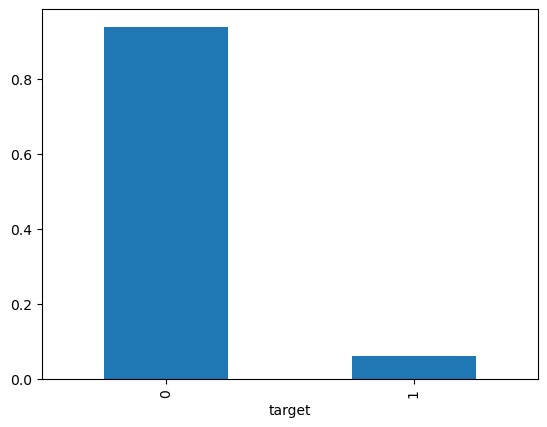

In [68]:
raw_df.target.value_counts(normalize=True).plot(kind='bar')

In [76]:
# Open the ZIP file
with zipfile.ZipFile(zip_file_path) as z:
    # Read the CSV file into a pandas DataFrame
    with z.open(test_fname) as f:
        test_df = pd.read_csv(f)

test_df

,qid,question_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...
3,000086e4b7e1c7146103,Who are entrepreneurs?
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?
...,...,...
375801,ffff7fa746bd6d6197a9,How many countries listed in gold import in in...
375802,ffffa1be31c43046ab6b,Is there an alternative to dresses on formal p...
375803,ffffae173b6ca6bfa563,Where I can find best friendship quotes in Tel...
375804,ffffb1f7f1a008620287,What are the causes of refraction of light?


In [84]:
# Open the ZIP file
with zipfile.ZipFile(zip_file_path) as z:
    # Read the CSV file into a pandas DataFrame
    with z.open(sample_fname) as f:
        sub_df = pd.read_csv(f)

sub_df

,qid,prediction
0,0000163e3ea7c7a74cd7,0
1,00002bd4fb5d505b9161,0
2,00007756b4a147d2b0b3,0
3,000086e4b7e1c7146103,0
4,0000c4c3fbe8785a3090,0
...,...,...
375801,ffff7fa746bd6d6197a9,0
375802,ffffa1be31c43046ab6b,0
375803,ffffae173b6ca6bfa563,0
375804,ffffb1f7f1a008620287,0


## 1.2 Create a Working Sample

In [722]:
SAMPLE_SIZE = 200_000

In [724]:
sample_df = raw_df.sample(SAMPLE_SIZE, random_state=42)
sample_df

,qid,question_text,target
443046,56d324bb1e2c29f43b12,What is the most effective classroom managemen...,0
947549,b9ad893dc78c577f8a63,Can I study abroad after 10th class from Bangl...,0
523769,6689ebaeeb65b209a412,How can I make friends as a college junior?,0
949821,ba1e2c4a0fef09671516,How do I download free APK Minecraft: Pocket E...,0
1030397,c9ea2b69bf0d74626f46,"Like Kuvera, is ""Groww"" also a free online inv...",0
...,...,...,...
937174,b7aac1f40d73a138ff5a,Is the Prynt gadget really worth for 149€?,0
751756,934b2933a1313c17bef3,How can I make money by pissing people off? He...,1
887579,ade56109a264f44359a7,"How successful is the book ""The therapy indust...",0
219753,2afce20f68cdb9c7a7ac,What is the best prediction anybody ever made?...,0


# 2 - Text Preprocessing Techniques

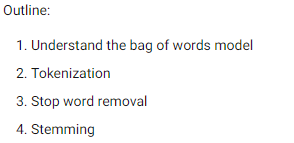

## 2.1 - Bag of Words Intuition

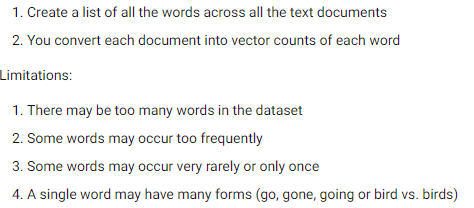

Document Vectors  
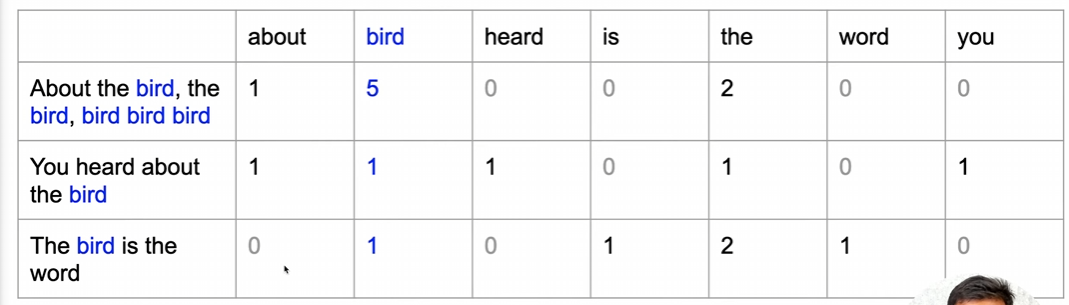

In [731]:
q0 = sincere_df.question_text.values[1]
q0

'Do you have an adopted dog, how would you encourage people to adopt and not shop?'

In [733]:
q1 = raw_df[raw_df.target == 1].question_text.values[0]
q1

'Has the United States become the largest dictatorship in the world?'

## 2.2 - Tokenization

splitting a document into words and separators

In [737]:
import nltk

In [739]:
from nltk.tokenize import word_tokenize

In [741]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [743]:
q0

'Do you have an adopted dog, how would you encourage people to adopt and not shop?'

In [745]:
word_tokenize(q0)

['Do',
 'you',
 'have',
 'an',
 'adopted',
 'dog',
 ',',
 'how',
 'would',
 'you',
 'encourage',
 'people',
 'to',
 'adopt',
 'and',
 'not',
 'shop',
 '?']

In [747]:
word_tokenize(' this is (something) with, a lot of, punctuation;')

['this',
 'is',
 '(',
 'something',
 ')',
 'with',
 ',',
 'a',
 'lot',
 'of',
 ',',
 'punctuation',
 ';']

In [749]:
q1

'Has the United States become the largest dictatorship in the world?'

In [751]:
word_tokenize(q1)

['Has',
 'the',
 'United',
 'States',
 'become',
 'the',
 'largest',
 'dictatorship',
 'in',
 'the',
 'world',
 '?']

In [753]:
q0_tok = word_tokenize(q0)
q1_tok = word_tokenize(q1)

## 2.3 Stop Word Removal

Removing commonly occuring words

In [757]:
q1_tok

['Has',
 'the',
 'United',
 'States',
 'become',
 'the',
 'largest',
 'dictatorship',
 'in',
 'the',
 'world',
 '?']

In [759]:
from nltk.corpus import stopwords

In [761]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [763]:
english_stopwords = stopwords.words('english')

In [765]:
", ".join(english_stopwords)

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [767]:
def remove_stopwords(tokens):
    return [word for word in tokens if word.lower() not in english_stopwords]

In [769]:
q0_tok

['Do',
 'you',
 'have',
 'an',
 'adopted',
 'dog',
 ',',
 'how',
 'would',
 'you',
 'encourage',
 'people',
 'to',
 'adopt',
 'and',
 'not',
 'shop',
 '?']

In [771]:
q0_stp = remove_stopwords(q0_tok)

In [773]:
q0_stp

['adopted', 'dog', ',', 'would', 'encourage', 'people', 'adopt', 'shop', '?']

In [775]:
q1_stp = remove_stopwords(q1_tok)
q1_stp

['United', 'States', 'become', 'largest', 'dictatorship', 'world', '?']

## 2.4 Stemming

"go", "gone", "going" -> "go"  

"birds", "bird" -> "bird"

In [779]:
from nltk.stem.snowball import SnowballStemmer

In [781]:
stemmer = SnowballStemmer(language='english')

In [783]:
stemmer.stem('going')

'go'

In [785]:
stemmer.stem('supposedly')

'suppos'

In [787]:
q0_stm = [stemmer.stem(word) for word in q0_stp]
q0_stp

['adopted', 'dog', ',', 'would', 'encourage', 'people', 'adopt', 'shop', '?']

In [789]:
q0_stm

['adopt', 'dog', ',', 'would', 'encourag', 'peopl', 'adopt', 'shop', '?']

In [791]:
q1_stm = [stemmer.stem(word) for word in q1_stp]
q1_stp

['United', 'States', 'become', 'largest', 'dictatorship', 'world', '?']

In [793]:
q1_stm

['unit', 'state', 'becom', 'largest', 'dictatorship', 'world', '?']

## 2.5 - Lemmatization

"love" -> "love"

"loving" -> "love

"lovable" -> "love"

more human friendly stemming. No need for algorithm to get the full word, it's just easier for interpretation by human (?)

# 3 - Implement Bag of Words

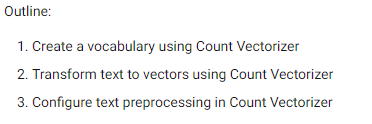

## 3.1 - Create a Vocabulary

In [801]:
sample_df

,qid,question_text,target
443046,56d324bb1e2c29f43b12,What is the most effective classroom managemen...,0
947549,b9ad893dc78c577f8a63,Can I study abroad after 10th class from Bangl...,0
523769,6689ebaeeb65b209a412,How can I make friends as a college junior?,0
949821,ba1e2c4a0fef09671516,How do I download free APK Minecraft: Pocket E...,0
1030397,c9ea2b69bf0d74626f46,"Like Kuvera, is ""Groww"" also a free online inv...",0
...,...,...,...
937174,b7aac1f40d73a138ff5a,Is the Prynt gadget really worth for 149€?,0
751756,934b2933a1313c17bef3,How can I make money by pissing people off? He...,1
887579,ade56109a264f44359a7,"How successful is the book ""The therapy indust...",0
219753,2afce20f68cdb9c7a7ac,What is the best prediction anybody ever made?...,0


In [803]:
small_df = sample_df[:5]
small_df

,qid,question_text,target
443046,56d324bb1e2c29f43b12,What is the most effective classroom managemen...,0
947549,b9ad893dc78c577f8a63,Can I study abroad after 10th class from Bangl...,0
523769,6689ebaeeb65b209a412,How can I make friends as a college junior?,0
949821,ba1e2c4a0fef09671516,How do I download free APK Minecraft: Pocket E...,0
1030397,c9ea2b69bf0d74626f46,"Like Kuvera, is ""Groww"" also a free online inv...",0


In [805]:
small_df.question_text.values

array(['What is the most effective classroom management skill/technique to create a good learning environment?',
       'Can I study abroad after 10th class from Bangladesh?',
       'How can I make friends as a college junior?',
       'How do I download free APK Minecraft: Pocket Edition for iOS (iPhone)?',
       'Like Kuvera, is "Groww" also a free online investment platform where I can invest in direct mutual funds?'],
      dtype=object)

In [807]:
from sklearn.feature_extraction.text import CountVectorizer

In [809]:
small_vect = CountVectorizer()

In [811]:
small_vect.fit(small_df.question_text)

CountVectorizer()

In [813]:
small_vect.vocabulary_

{'what': 49,
 'is': 31,
 'the': 47,
 'most': 39,
 'effective': 16,
 'classroom': 9,
 'management': 37,
 'skill': 44,
 'technique': 46,
 'to': 48,
 'create': 11,
 'good': 23,
 'learning': 34,
 'environment': 17,
 'can': 7,
 'study': 45,
 'abroad': 1,
 'after': 2,
 '10th': 0,
 'class': 8,
 'from': 21,
 'bangladesh': 6,
 'how': 25,
 'make': 36,
 'friends': 20,
 'as': 5,
 'college': 10,
 'junior': 32,
 'do': 13,
 'download': 14,
 'free': 19,
 'apk': 4,
 'minecraft': 38,
 'pocket': 43,
 'edition': 15,
 'for': 18,
 'ios': 29,
 'iphone': 30,
 'like': 35,
 'kuvera': 33,
 'groww': 24,
 'also': 3,
 'online': 41,
 'investment': 28,
 'platform': 42,
 'where': 50,
 'invest': 27,
 'in': 26,
 'direct': 12,
 'mutual': 40,
 'funds': 22}

In [815]:
small_vect.get_feature_names_out()

array(['10th', 'abroad', 'after', 'also', 'apk', 'as', 'bangladesh',
       'can', 'class', 'classroom', 'college', 'create', 'direct', 'do',
       'download', 'edition', 'effective', 'environment', 'for', 'free',
       'friends', 'from', 'funds', 'good', 'groww', 'how', 'in', 'invest',
       'investment', 'ios', 'iphone', 'is', 'junior', 'kuvera',
       'learning', 'like', 'make', 'management', 'minecraft', 'most',
       'mutual', 'online', 'platform', 'pocket', 'skill', 'study',
       'technique', 'the', 'to', 'what', 'where'], dtype=object)

## 3.2 - Transform documents into Vectors

In [818]:
vectors = small_vect.transform(small_df.question_text)
vectors

<5x51 sparse matrix of type '<class 'numpy.int64'>'
	with 56 stored elements in Compressed Sparse Row format>

In [820]:
vectors.shape

(5, 51)

In [822]:
small_df.question_text.values[0]

'What is the most effective classroom management skill/technique to create a good learning environment?'

In [824]:
vectors[0].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
        1, 0, 1, 1, 1, 1, 0]], dtype=int64)

In [826]:
# Carefull with large data
vectors.toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
        1, 0, 1, 1, 1, 1, 0],
       [1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
        0, 0, 0, 0, 0, 0, 1]], dtype=int64)

Output above is just a number of words containing in a single question text from total pool of 51 words from value small_vect

## 3.3 - Configure Count Vectorizer Parameters

In [830]:
stemmer = SnowballStemmer(language='english')

In [832]:
def tokenize(text):
    return [stemmer.stem(word) for word in word_tokenize(text)]

In [834]:
tokenize('What is the really (dealing) here?')

['what', 'is', 'the', 'realli', '(', 'deal', ')', 'here', '?']

In [836]:
vectorizer = CountVectorizer(lowercase=True, 
                             tokenizer=tokenize,
                             stop_words=english_stopwords,
                             max_features=3000)

In [838]:
%%time
vectorizer.fit(sample_df.question_text)

D:\conda\Lib\site-packages\sklearn\feature_extraction\text.py:523: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
D:\conda\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'s", 'abov', 'ani', 'becaus', 'befor', 'could', 'doe', 'dure', 'might', 'must', "n't", 'need', 'onc', 'onli', 'ourselv', 'sha', 'themselv', 'veri', 'whi', 'wo', 'would', 'yourselv'] not in stop_words.
  warnings.warn(


CPU times: total: 29.9 s
Wall time: 30 s


CountVectorizer(max_features=3000,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                tokenizer=<function tokenize at 0x000002473C0F1F80>)

In [839]:
len(vectorizer.vocabulary_)

3000

In [840]:
vectorizer.get_feature_names_out()[:100]

array(['!', '#', '$', '%', '&', "'", "''", "'d", "'m", "'s", '(', ')',
       '*', '+', ',', '-', '.', '..', '/', '/math', '0', '1', '10', '100',
       '1000', '10th', '11', '11th', '12', '12th', '13', '14', '15', '16',
       '17', '18', '19', '1st', '2', '20', '200', '2000', '2016', '2017',
       '2018', '2019', '2020', '21', '22', '23', '24', '25', '2nd', '3',
       '30', '300', '3d', '3rd', '4', '40', '4th', '5', '50', '500', '6',
       '60', '7', '70', '7th', '8', '80', '9', '90', ':', ';', '<', '=',
       '>', '?', '[', ']', '^', '``', 'ab', 'abandon', 'abil', 'abl',
       'abort', 'abov', 'abroad', 'absolut', 'abus', 'ac', 'academ',
       'academi', 'acceler', 'accent', 'accept', 'access', 'accid'],
      dtype=object)

In [841]:
%%time
inputs = vectorizer.transform(sample_df.question_text)

CPU times: total: 31.4 s
Wall time: 32 s


In [842]:
inputs.shape

(200000, 3000)

In [843]:
inputs

<200000x3000 sparse matrix of type '<class 'numpy.int64'>'
	with 1342959 stored elements in Compressed Sparse Row format>

In [844]:
sample_df.question_text.values[0]

'What is the most effective classroom management skill/technique to create a good learning environment?'

In [845]:
inputs[0].toarray()

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [846]:
sample_df.question_text.values[0]

'What is the most effective classroom management skill/technique to create a good learning environment?'

In [847]:
test_df

,qid,question_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...
3,000086e4b7e1c7146103,Who are entrepreneurs?
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?
...,...,...
375801,ffff7fa746bd6d6197a9,How many countries listed in gold import in in...
375802,ffffa1be31c43046ab6b,Is there an alternative to dresses on formal p...
375803,ffffae173b6ca6bfa563,Where I can find best friendship quotes in Tel...
375804,ffffb1f7f1a008620287,What are the causes of refraction of light?


In [848]:
%%time
test_inputs = vectorizer.transform(test_df.question_text)

CPU times: total: 58.6 s
Wall time: 58.9 s


# 4 - ML Models for Text Classification

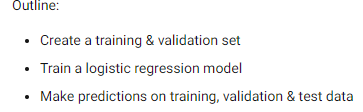

## 4.1 - Split into Training and Validation Set

In [852]:
sample_df

,qid,question_text,target
443046,56d324bb1e2c29f43b12,What is the most effective classroom managemen...,0
947549,b9ad893dc78c577f8a63,Can I study abroad after 10th class from Bangl...,0
523769,6689ebaeeb65b209a412,How can I make friends as a college junior?,0
949821,ba1e2c4a0fef09671516,How do I download free APK Minecraft: Pocket E...,0
1030397,c9ea2b69bf0d74626f46,"Like Kuvera, is ""Groww"" also a free online inv...",0
...,...,...,...
937174,b7aac1f40d73a138ff5a,Is the Prynt gadget really worth for 149€?,0
751756,934b2933a1313c17bef3,How can I make money by pissing people off? He...,1
887579,ade56109a264f44359a7,"How successful is the book ""The therapy indust...",0
219753,2afce20f68cdb9c7a7ac,What is the best prediction anybody ever made?...,0


In [853]:
inputs.shape

(200000, 3000)

In [854]:
from sklearn.model_selection import train_test_split

In [855]:
train_inputs, val_inputs, train_targets, val_targets = train_test_split(inputs, sample_df.target, 
                                                                        test_size=0.3, random_state=42)

In [856]:
train_inputs.shape

(140000, 3000)

In [857]:
train_targets.shape

(140000,)

In [858]:
val_inputs.shape

(60000, 3000)

In [859]:
val_targets.shape

(60000,)

## 4.2 - Train Logistic Regression model

In [861]:
from sklearn.linear_model import LogisticRegression

In [862]:
MAX_ITER = 10_000

In [863]:
model = LogisticRegression(max_iter=MAX_ITER, solver='sag')

In [864]:
%%time
model.fit(train_inputs, train_targets)

CPU times: total: 47.8 s
Wall time: 48.3 s


LogisticRegression(max_iter=10000, solver='sag')

## 4.3 - Make predictions using the model


In [866]:
train_preds = model.predict(train_inputs)

In [867]:
train_targets

1035913    0
385090     1
535776     0
220144     0
542266     0
          ..
1256346    0
1172416    0
960004     0
1028956    1
6837       0
Name: target, Length: 140000, dtype: int64

In [868]:
train_preds

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [869]:
pd.Series(train_preds).value_counts()

0    135278
1      4722
Name: count, dtype: int64

In [870]:
pd.Series(train_targets).value_counts()

target
0    131484
1      8516
Name: count, dtype: int64

In [871]:
from sklearn.metrics import accuracy_score

In [901]:
accuracy_score(train_targets, train_preds)

0.9541428571428572

In [903]:
import numpy as np

In [905]:
accuracy_score(train_targets, np.zeros(len(train_targets)))

0.9391714285714285

In [907]:
from sklearn.metrics import f1_score

In [909]:
f1_score(train_targets, train_preds)

0.5150324822480737

In [911]:
f1_score(train_targets, np.zeros(len(train_targets)))

0.0

In [913]:
random_preds = np.random.choice((0, 1), len(train_targets))
f1_score(train_targets, random_preds)

0.10881245612915577

In [915]:
val_preds = model.predict(val_inputs)

In [917]:
accuracy_score(val_targets, val_preds)

0.95105

In [919]:
f1_score(val_targets, val_preds)

0.4763772508468533

In [921]:
sincere_df.question_text.values[:10]

array(['How did Quebec nationalists see their province as a nation in the 1960s?',
       'Do you have an adopted dog, how would you encourage people to adopt and not shop?',
       'Why does velocity affect time? Does velocity affect space geometry?',
       'How did Otto von Guericke used the Magdeburg hemispheres?',
       'Can I convert montra helicon D to a mountain bike by just changing the tyres?',
       'Is Gaza slowly becoming Auschwitz, Dachau or Treblinka for Palestinians?',
       'Why does Quora automatically ban conservative opinions when reported, but does not do the same for liberal views?',
       'Is it crazy if I wash or wipe my groceries off? Germs are everywhere.',
       'Is there such a thing as dressing moderately, and if so, how is that different than dressing modestly?',
       'Is it just me or have you ever been in this phase wherein you became ignorant to the people you once loved, completely disregarding their feelings/lives so you get to have something g

In [923]:
sincere_df.target.values[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [925]:
model.predict(vectorizer.transform(sincere_df.question_text.values[:10]))

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [927]:
insincere_df.question_text.values[:10]

array(['Has the United States become the largest dictatorship in the world?',
       'Which babies are more sweeter to their parents? Dark skin babies or light skin babies?',
       "If blacks support school choice and mandatory sentencing for criminals why don't they vote Republican?",
       'I am gay boy and I love my cousin (boy). He is sexy, but I dont know what to do. He is hot, and I want to see his di**. What should I do?',
       'Which races have the smallest penis?',
       'Why do females find penises ugly?',
       'How do I marry an American woman for a Green Card? How much do they charge?',
       "Why do Europeans say they're the superior race, when in fact it took them over 2,000 years until mid 19th century to surpass China's largest economy?",
       'Did Julius Caesar bring a tyrannosaurus rex on his campaigns to frighten the Celts into submission?',
       "In what manner has Republican backing of 'states rights' been hypocritical and what ways have they actually r

In [929]:
insincere_df.target.values[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [931]:
model.predict(vectorizer.transform(insincere_df.question_text.values[:10]))

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 0], dtype=int64)